# <font color ="royalblue"> <font face = 'Century'> -- **Spaceship Titanic** --

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font face = 'Century'> Importing the datasets:

In [128]:
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR8_DpTfwF69EJD3UXNBYFobIwCI6MxwaxG5ig7FNc-CV3a5dxjrktgNOWYyh09F9suWW_0ppny-_EX/pub?gid=281139100&single=true&output=csv')
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTzWR9KXTaF9YhUOx0U9EJFaPYpLrlXO-Gj1kZ6EAGE84FWUMezoZXzMCOQTediw7dx_UDnl5iNg5kd/pub?gid=1184477590&single=true&output=csv')

<font face = 'Century'> Let's check them a little bit:

In [129]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [130]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [131]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [132]:
df_train.shape

(8693, 14)

## <font color ="royalblue"> <font face = 'Century' > Cleaning Dataset

<font face = 'Century'> Let's check the number of null or empty data:

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [134]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [135]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<font face = 'Century'> Let's fix them all.

In [136]:
# Cleaning Dataset
df_train = df_train.dropna(subset=['Name'])
df_train["Destination"].fillna("TRAPPIST-1e", inplace = True)
df_train["Cabin"].fillna(method='pad', inplace = True)
df_train["CryoSleep"].fillna(method='pad', inplace = True)
df_train["HomePlanet"].fillna("Earth", inplace = True)
df_train["Age"].fillna(method='pad', inplace = True)
df_train["VIP"].fillna(False, inplace = True)
df_train['RoomService'].fillna(df_train['RoomService'].mean(), inplace = True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].mean(), inplace = True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].mean(), inplace = True)
df_train['Spa'].fillna(df_train['Spa'].mean(), inplace = True)
df_train['VRDeck'].fillna(df_train['VRDeck'].mean(), inplace = True)


<font face = 'Century'> Reset of index values:

In [137]:
index = list(range(0, 8493))
df_train.index = index
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## <font color ="royalblue"> <font face = 'Century' >  Dataset Preparation

<font face = 'Century'> Let's create some functions to convert some of the columns as categorical variables.

> <font face = 'Century'>  a. The `Passenger` column is going to be devided by two different columns called `Group` and `ID` respectively:

In [138]:
def split_Passenger(d, col):
    
    Group = []
    Id= []
    
    for i in range(len(d[col])):
       split = d[col][i].split('_')
       Group.append(split[0])
       Id.append(split[1])
    
    d['Group'] = Group 
    d['ID'] = Id
    
    return d

><font face = 'Century'>  b.  `HomePlanet` and `Destination` columns are going to be devided by 3 different columns called by their unique elements:

In [139]:
def one_hot(d, col):
    
    df = [np.array(d[col] == i).astype(int) for i in d[col].unique()]
    
    count = 0
    for i in d[col].unique():
        d[i] = df[count]
        count += 1
        
    return d

> <font face = 'Century'> c.  `Name` column is going to be devided by two different columns called `Name` and `Last_Name` respectively:

In [140]:
def split_Name(d, col):
    
    Name = []
    Last_Name = []
    
    for i in range(len(d[col])):
       split = d[col][i].split(' ')
       Name.append(split[0])
       Last_Name.append(split[1])
    
    d['Name'] = Name
    d['Last_Name'] = Last_Name
    
    return d

><font face = 'Century'>  d.  `Cryosleep`, `VIP` and `Transported` columns are going to be created as a boolean column:

In [141]:
def T_F(d, col):
    
    df = d[col].values.astype(int)
    
    d.drop([col], axis = 1)
    
    d[col] = df
    
    return 

> <font face = 'Century'> e.  For all the `services`, categorical columns are going to be created according to the service taken by the passenger and will be called as `Cont_X`, where _X_ is the name of the service:

In [142]:
def taken_services(d, col):
    
    cont_service= (df_train[col].values > 0).astype(int)
    
    d['Cont_'+ col] = cont_service
    
    return d

> <font face = 'Century'> f.  The `Age` column will be devided by age ranges according to _older_, _adult_ and _young_ passengers:

In [143]:
def age_range(d, col):
    
    youth = (df_train[col].values <= 18).astype(int)
    adult = ((df_train[col].values > 18) & (df_train[col].values <= 60)).astype(int)
    older = (df_train[col].values > 60).astype(int)
    
    del(d['Age'])
    d['Youth'] = youth
    d['Adult'] = adult
    d['Older'] = older

    return d

<font face = 'Century'> **Applying all the functions above to the dataset :**

In [144]:
# Split for PassengerId and Name:
split_Passenger(df_train, 'PassengerId')
split_Name(df_train, 'Name').head()

# To one hot for HomePlanet and Destination columns:
one_hot(df_train, 'HomePlanet').head()
one_hot(df_train, 'Destination').head()

# Categorical column for CryoSleep, VIP and Transported:
T_F(df_train, 'CryoSleep')
T_F(df_train, 'VIP')
T_F(df_train, 'Transported')

# Categorical columns for services taken and not taken:
taken_services(df_train, 'RoomService')
taken_services(df_train, 'FoodCourt')
taken_services(df_train, 'ShoppingMall')
taken_services(df_train, 'Spa')
taken_services(df_train, 'VRDeck')

# Categorical columns for range of ages in Age column:
age_range(df_train, 'Age')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,...,0,0,1,1,1,1,1,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,...,0,0,1,1,0,1,1,0,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,...,0,0,0,1,1,1,1,0,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,...,0,0,1,1,1,1,1,1,0,0


<font face = 'Century'> Current columns:
> Number of columns = 30

In [145]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Group', 'ID', 'Last_Name', 'Europa', 'Earth', 'Mars',
       'TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Cont_RoomService',
       'Cont_FoodCourt', 'Cont_ShoppingMall', 'Cont_Spa', 'Cont_VRDeck',
       'Youth', 'Adult', 'Older'],
      dtype='object')

## <font color ="royalblue"> <font face = 'Century' >  Model Evaluation

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error

<font face = 'Century' > To start working we are going to crate a copy of `df_train` and save it into a new variable `df` to avoid modifying the original data and we are going to replace the index for `PassengerId` column.

In [147]:
df = df_train.copy()

In [148]:
df.index = df['PassengerId']
del[df['PassengerId']]

In [149]:
df

,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
0002_01,Earth,0,F/0/S,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,...,0,0,1,1,1,1,1,0,1,0
0003_01,Europa,0,A/0/S,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,...,0,0,1,1,0,1,1,0,1,0
0003_02,Europa,0,A/0/S,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,...,0,0,0,1,1,1,1,0,1,0
0004_01,Earth,0,F/1/S,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,0,A/98/P,55 Cancri e,1,0.0,6819.0,0.0,1643.0,74.0,...,0,1,0,1,0,1,1,0,1,0
9278_01,Earth,1,G/1499/S,PSO J318.5-22,0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
9279_01,Earth,0,G/1500/S,TRAPPIST-1e,0,0.0,0.0,1872.0,1.0,0.0,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' >  As we are going to make predictions we need to delete all categorical columns that don't contribute to the prediction process. 

In [150]:
for col in df:
    if df[col].dtype == 'O':
        df = df.drop([col], axis=1)
df

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Europa,Earth,...,PSO J318.5-22,55 Cancri e,Cont_RoomService,Cont_FoodCourt,Cont_ShoppingMall,Cont_Spa,Cont_VRDeck,Youth,Adult,Older
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
0002_01,0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,...,0,0,1,1,1,1,1,0,1,0
0003_01,0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,...,0,0,1,1,0,1,1,0,1,0
0003_02,0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,...,0,0,0,1,1,1,1,0,1,0
0004_01,0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0,1,0.0,6819.0,0.0,1643.0,74.0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
9278_01,1,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9279_01,0,0,0.0,0.0,1872.0,1.0,0.0,1,0,1,...,0,0,0,0,1,1,0,0,1,0


<font face = 'Century' > Next, we divided the train dataframe into two groups, one for training that corresponds to the 70% of the total  and one for testing that corresponds to the missing 30%.

In [151]:
Xtr = df[[col for col in df.columns if col!= 'Transported']].values[:5945]
ytr = df['Transported'].values[:5945]

In [152]:
Xts = df[[col for col in df.columns if col!= 'Transported']].values[:2548]
yts = df['Transported'].values[:2548]

<font face = 'Century' > Finally, we have our dataset ready for training the model that we are going to define in the following steps.

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

<font face = 'Century'> **Running different types of estimators:**

In [154]:
estimator_type = [RandomForestClassifier(n_estimators=5, max_depth=30), DecisionTreeClassifier(max_depth=2), Pipeline((("pca", PCA(n_components=2)), ("estimator", estimator))), SVC(gamma = 1)]

for i in estimator_type:
    estimator = i
    estimator.fit(Xtr,ytr)
    
    print(estimator)
    print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
    print ("test accuracy  %.2f"%estimator.score(Xts,yts),'\n')
    

RandomForestClassifier(max_depth=30, n_estimators=5)
train accuracy 0.89
test accuracy  0.88 

DecisionTreeClassifier(max_depth=2)
train accuracy 0.71
test accuracy  0.72 

Pipeline(steps=[('pca', PCA(n_components=2)), ('estimator', SVC(gamma=1))])
train accuracy 0.89
test accuracy  0.87 

SVC(gamma=1)
train accuracy 0.91
test accuracy  0.90 



<font face = 'Century'> As we can see, the best perfomance gotten with an estimator is SVC

In [155]:
estimator = SVC(gamma=1)
estimator.fit(Xtr,ytr)

SVC(gamma=1)

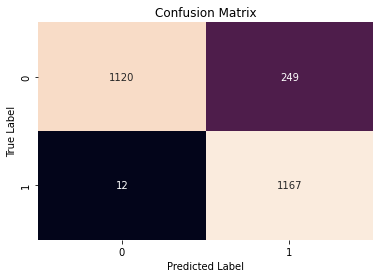

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()